In [1]:
#import sys
#!{sys.executable} -m pip install matplotlib.pyplot

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
from astropy.visualization.hist import hist as fancyhist

import pandas
pandas.set_option('display.max_columns', None)

%matplotlib inline
#%config InlineBackend.figure_format='retina'
plt.style.use(['labstyle.mplstyle']) 

# Functions

In [2]:
def Plot(x_data, y_data, x_label='', y_label='', xbins=20, hist2d_nbins=200, x_min=None, x_max=None, y_min=None, y_max=None, xlog=True, ylog=True):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)


    # First Plot
    ax = axes[0]
    ax.set_title(f'Means of {int(xbins)} log-spaced bins')
    bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.mean(x_temp), 
                                  np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                                  np.mean(y_temp), 
                                  np.std(y_temp, ddof=1)/np.sqrt(N_temp)])

    ax.errorbar(x=statistics[:,1], 
                y=statistics[:,3], 
                xerr=statistics[:,2], 
                yerr=statistics[:,4], 
                fmt='.k', ecolor='grey', capthick=1)
    
    x_min_bins = np.min(statistics[:,1])
    x_max_bins = np.max(statistics[:,1])
    y_min_bins = np.min(statistics[:,3])
    y_max_bins = np.max(statistics[:,3])
    
    if xlog==True: 
        ax.set_xscale('log')
        ax.set_xlim(0.5*x_min_bins, 1.5*x_max_bins)
    else: 
        ax.set_xlim(0.99*x_min_bins, 1.01*x_max_bins)
        
    if ylog==True: 
        ax.set_yscale('log')
        ax.set_ylim(0.5*y_min_bins, 1.5*y_max_bins)
    else:
        ax.set_ylim(0.95*y_min_bins, 1.05*y_max_bins)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


    # Second Plot
    ax = axes[1]
    ax.set_title(f'2-D histogram of the data')
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=hist2d_nbins)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=hist2d_nbins)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
    
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel(x_label)
    
    cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax, label='$N_{points}/bin$')
    
    return fig, axes, statistics, hist

# Analyze the input data

In [3]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


# Analyze the output data

In [4]:
results = Table.read('./out_full/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.024257,0.148864,0.034852,0.180222,0.024923,0.150864,0.813277,0.064224,1.966500,0.049148,1.459651,0.023274,0.161777,0.016154,2.532923,0.126091,7.830311,1.957578,1.331683,0.264,0.60,0.264,0.60,0.264,0.60,2.621240,1.072804,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,647.0,20.0,0.0,0.1,46.5,600.703624,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.055656e+32,1.299495e+31,1.112661e+33,2.733061e+31,2.468935e+36,2.327126e+32,2.470826e+36,5.658388e+09,1.114690e-04,3.891712e-04,1.230300e-04,5.279591e+36,3.974634e+33,3.919185e+33,5.544877e+31,5.279295e+36,2.953351e+32,2.062985e+09,2.062985e+09,7.630566e+01,3.595402e+09,3.595401e+09,1.153994e+03,7.954457e+50,7.786732e+50,1.677245e+49,0.163447,0.855873,1.471915,1.969252,2.509335
1,1237657873254973544,1.703986,1.943519,2.361601,3.351815,1.720523,1.963627,0.242112,0.012637,0.443666,0.014797,0.344725,0.011248,0.093262,0.009139,0.522656,0.030554,0.118907,0.029727,0.249372,0.044,0.10,0.044,0.10,0.044,0.10,0.737715,0.193441,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,541.0,1042.152363,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.829330e+32,2.316632e+34,4.615793e+32,5.564139e+34,4.149507e+35,4.743766e+35,9.687794e+35,3.278326e+09,4.043335e-01,4.437052e-01,4.077165e-01,3.973401e+36,1.988034e+35,3.698753e+33,1.951046e+35,2.966458e+36,1.006943e+36,1.277028e+09,1.276785e+09,2.426724e+05,2.001298e+09,1.997463e+09,3.834491e+06,5.996591e+52,8.757685e+50,5.909014e+52,0.091143,0.253507,0.362687,0.441209,0.500566
2,1237654880726286453,0.912346,1.924841,0.939005,1.961911,0.914507,1.927816,0.207874,0.011325,0.654413,0.019171,0.456883,0.019417,0.044528,0.005430,0.878735,0.046464,0.082754,0.020689,0.770858,0.154,0.35,0.154,0.35,0.154,0.35,1.555298,0.623578,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,46.5,1453.856923,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.652499e+33,4.475367e+23,3.824081e+33,9.634630e+23,2.570888e+36,8.364153e+24,2.576364e+36,1.980224e+10,4.211531e-12,1.470370e-11,4.648328e-12,9.388564e+36,1.550025e+34,1.550025e+34,2.094970e+

# 1) Study of the sSFR model in the closed-box approximation

$$SFR(t) \, =  \epsilon \, M_{gas}^\alpha (t) \, \overset{\mathrm{{Kennicut}}}{=} \, \dfrac{\epsilon}{\tau_{dyn}} M_{gas}(t) \, \doteq \; \epsilon' \, M_{gas}(t)$$

$$\dfrac{dM_{gas}(t)}{dt} \, = \, \dot{M}_{gas}^{in}(t) - \dot{M}_{gas}^{out}(t) - (1-R)SFR(t) \, \overset{\mathrm{closed-box}}{=} \, -SFR(t) \, = \, -\epsilon' \, M_{gas}(t) \:\: \overset{\mathrm{if \, \epsilon(t) = \epsilon}}{\Longrightarrow }\:\: \color{lime}{M_{gas}(t) \, = \, M_{gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$\color{lime}{SFR(t) \, = \, \epsilon' M_{gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$M_{star}(t) \, = \, \int_{t_0}^t SFR(t')dt' \:\: \Longrightarrow \:\: \color{lime}{M_{star}(t) \, = \, M_{gas}(t_0)\{1-\exp{[-\epsilon' (t-t_0)]\}}}$$

$$\color{lime}{sSFR(t) \, = \, \dfrac{SFR(t)}{M_{star}(t)} \, = \, \epsilon'\dfrac{\exp{[-\epsilon' (t-t_0)]}}{1-\exp{[-\epsilon' (t-t_0)]}}}$$

In [5]:
def sSFR (age, epsilon, tdyn):
    epsilon_primed = epsilon / tdyn
    return epsilon_primed * np.exp(-epsilon_primed*age) / (1 - np.exp(-epsilon_primed*age))

In [6]:
#define our variables
epsilon = 0.02 #from Kennicut
tdyn = 2*10**7 #also from Kennicut

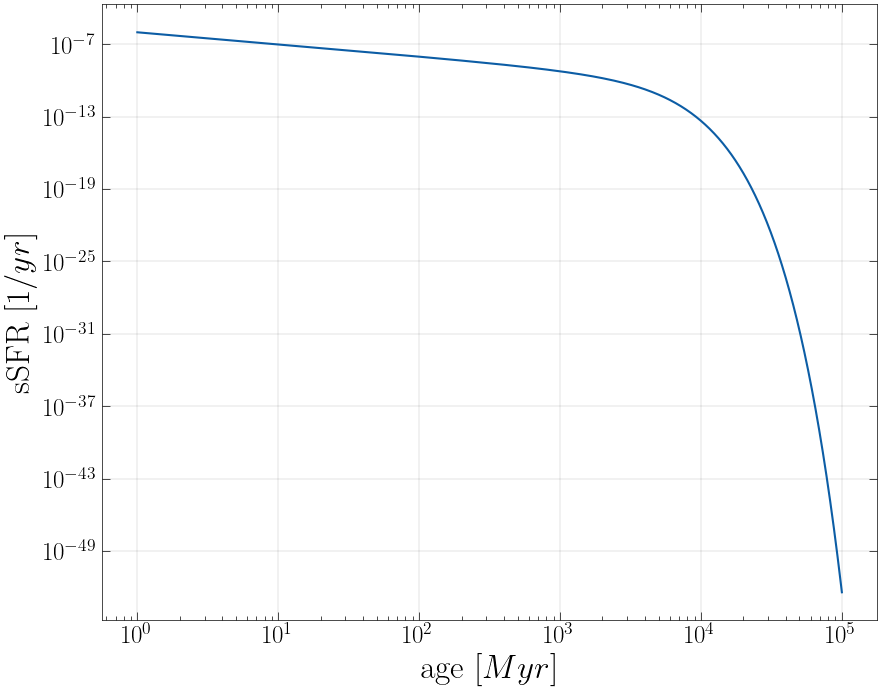

In [7]:
age = np.linspace(10**0, 10**5, 1000) # in Myr
sSFR_points = sSFR(age*10**6, epsilon, tdyn) #in 1/years !!!!!
plt.plot(age, sSFR_points)

plt.xlabel("age $[Myr]$")
plt.ylabel("sSFR $[1/yr]$")
plt.xscale('log')
plt.yscale('log')

## 1.1) best.sfh.sfr10Myrs

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


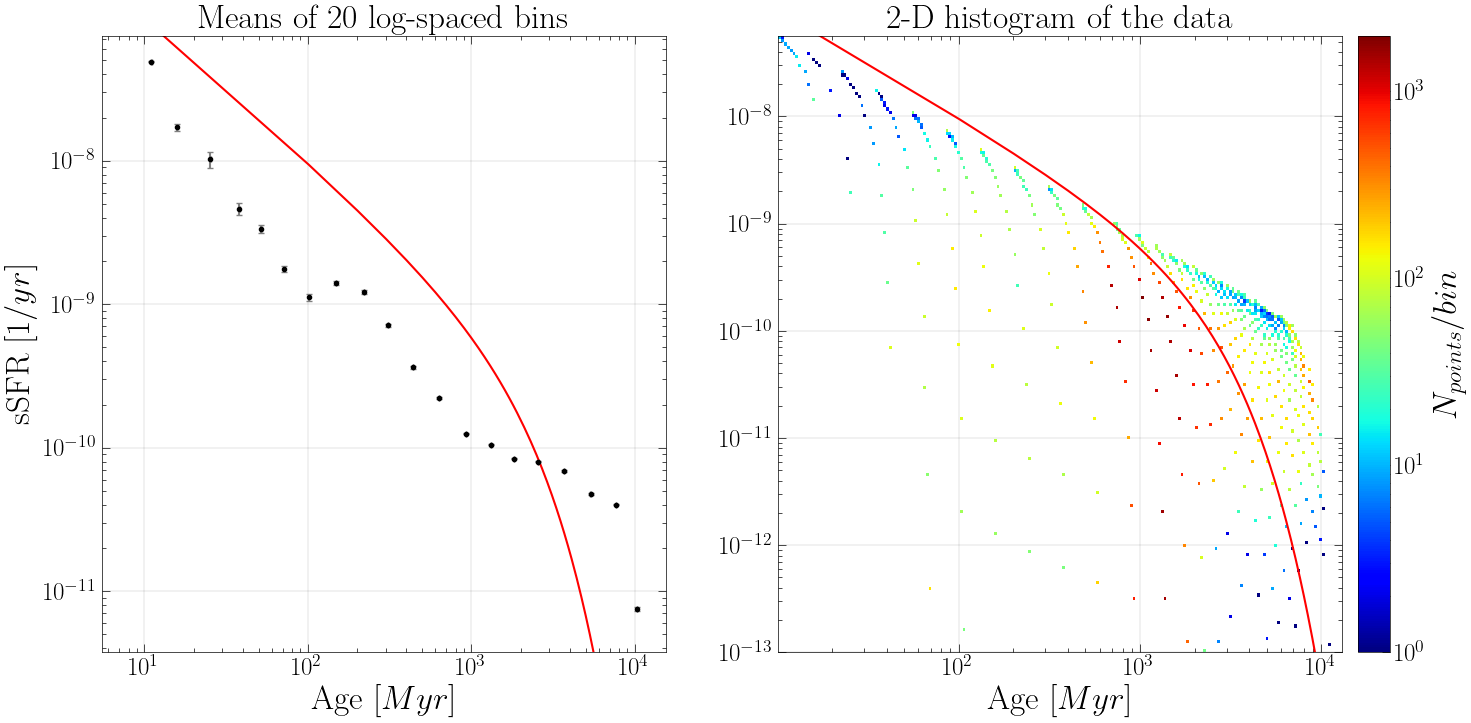

In [8]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=200, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')
ax[0].plot(age, sSFR_points, color='red')
ax[1].plot(age, sSFR_points, color='red')

plt.show()

## 1.2) bayes.sfh.sfr10Myrs

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


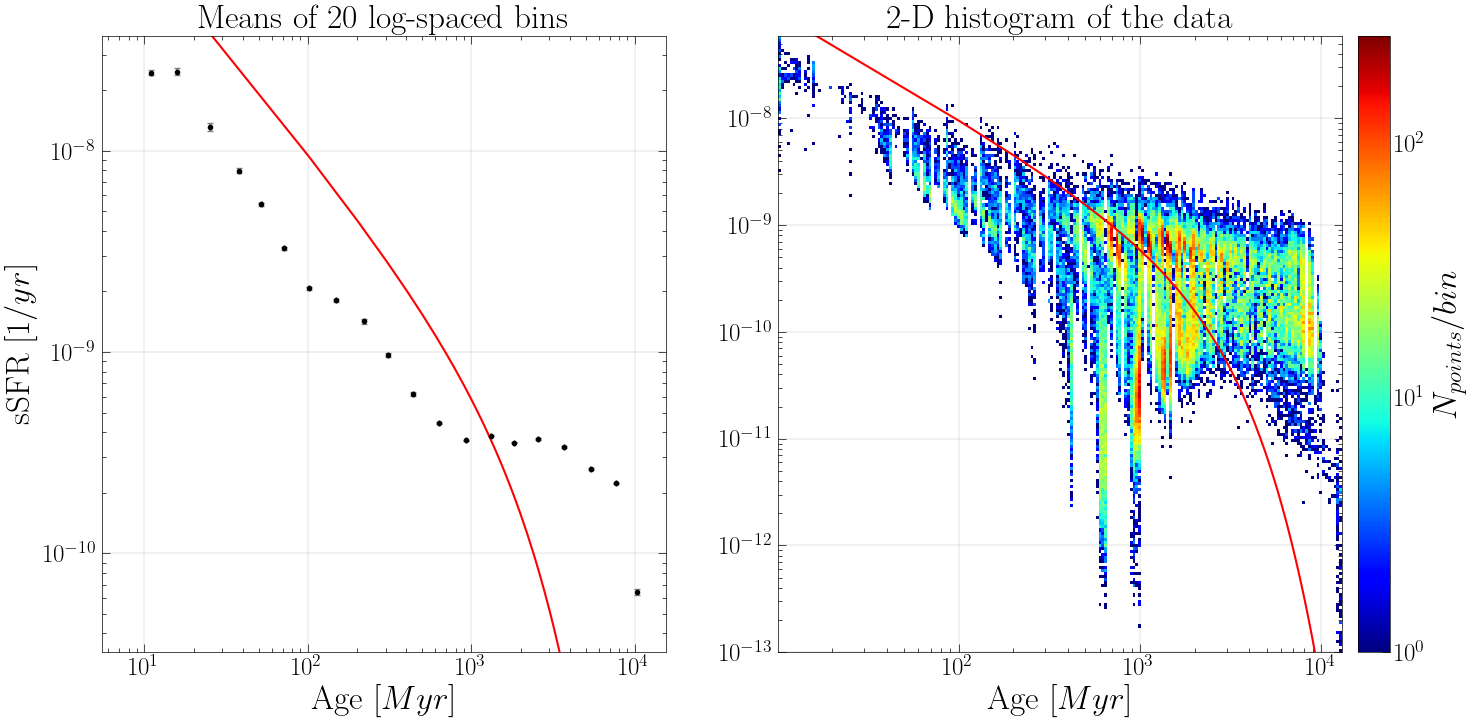

In [9]:
x_data = results['best.stellar.age_m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=200, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')
ax[0].plot(age, sSFR_points, color='red')
ax[1].plot(age, sSFR_points, color='red')

plt.show()

Abbiamo galassie con sSFR più alto rispetto al modello (closed-box).\
Mantenendo closed-box, avremmo bisogno di un $t_{dyn}$ più basso (--> $\epsilon'$ più alto) e quindi ($t_{dyn} \propto \rho^{-1/2}$) di galassie più dense!

Quindi:
- diminuiamo $t_{dyn}$ e vediamo quale descrive bene le $Age$ elevate;
- se possibile, calcoliamo le densità delle galassie e vediamo se sono maggiori. Fossati dice che ricavare le densità a partire dai dati di Cigale (size che contiene 50% della luminosità $\propto$ raggio galassia) è molto complicato.

Open-box --> inflow di massa

Rotational curve galassia --> Rotazione in alone 

Cambiare massa di un fattore 10 fa cambiare le velocità di radice di 10 at most
**cambiare raggio e velocità viriale(massa) cambia davvero poco per tdyn!!**

Modelllo closed-box --> sSFR deve scendere per forza, difficile che io trovi MS

300/400 km/s 

### Test KDE

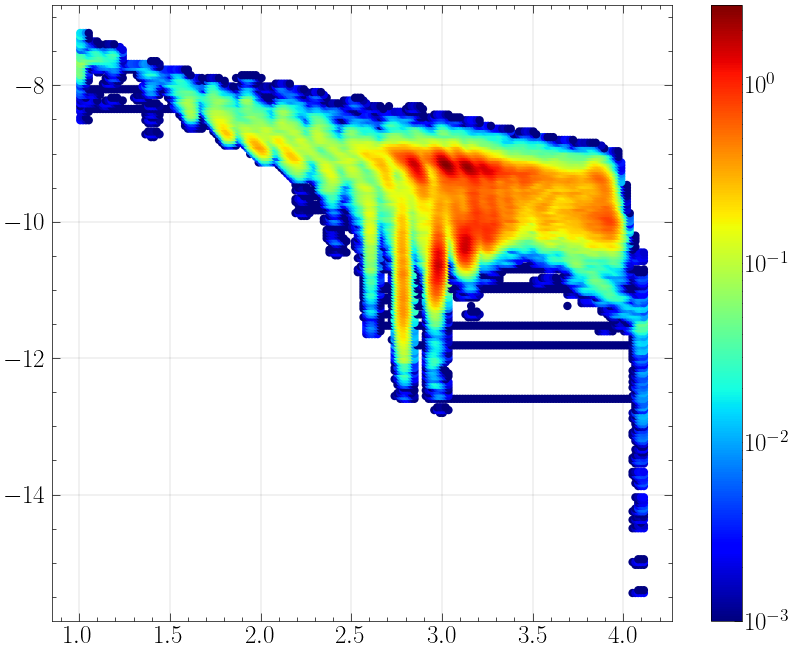

In [10]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
x_data = np.log10(results['best.stellar.age_m_star'])
y_data = np.log10(results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star'])
X = np.array([x_data, y_data]).T

#bwrange = np.linspace(0.005, 0.01, 5)
#K = 5
#grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K, verbose=3, n_jobs=10)
#grid.fit(X)
#h_opt = grid.best_params_['bandwidth']
#print(h_opt) 

kde = KernelDensity(kernel='epanechnikov', bandwidth=0.05)
kde.fit(X) 

u = np.linspace(np.min(x_data), np.max(x_data), 200)
v = np.linspace(np.min(y_data), np.max(y_data), 200)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(u, v)))).T
dens = np.exp(kde.score_samples(Xgrid))

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, cmap="jet", edgecolor="None", norm=matplotlib.colors.LogNorm(vmin=1e-3))
plt.colorbar();

## 1.3) sSFR vs Mass with age colormap

We see that the galaxies that are not described by the model (keeping Kennicut's numbers) are the old and star-forming ones, i.e. the red ones in this plot

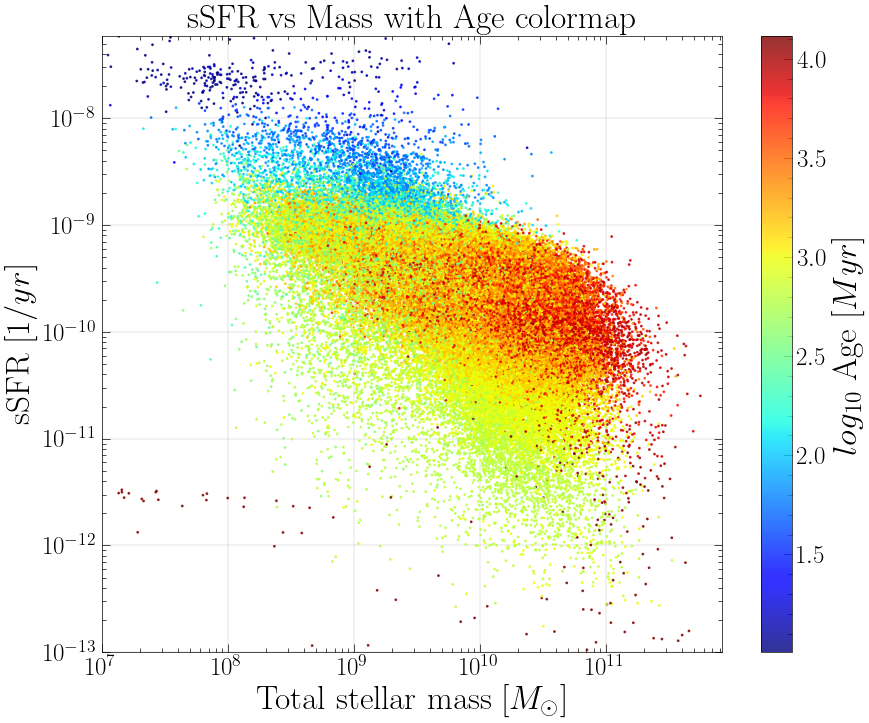

In [11]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
colormap_age = np.log10(results['best.stellar.age_m_star'])

plt.rcParams['figure.figsize'] = [10 , 8]

x_min = 1e7
x_max = np.max(x_data)
y_min = 1e-13
y_max = np.max(y_data)
hist2d_nbins = 200

plt.title(f'sSFR vs Mass with Age colormap')
plt.scatter(x_data, y_data, c=colormap_age, cmap=plt.cm.jet, alpha=0.8, s=1)
plt.colorbar(label='$log_{{10}}$ Age $[Myr]$')

plt.xscale('log')
plt.yscale('log')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Total stellar mass $[M_\odot]$')
plt.ylabel('sSFR $[1/yr]$');

## 1.4) Searching for a $t_{dyn}$ which fits the old star-forming galaxies

Cambiamo $t_{dyn}$ per vedere quale possa descrivere le galassie vecchie con alto $sSFR$ e troviamo la $\rho$ che dovrebbero avere (dovrebbe essere ***unphysical***)

In [12]:
#define our variables
epsilon = 0.02 #from Kennicut
tdyn = np.linspace(2* 10**7,  10**8.5, 6) #in years

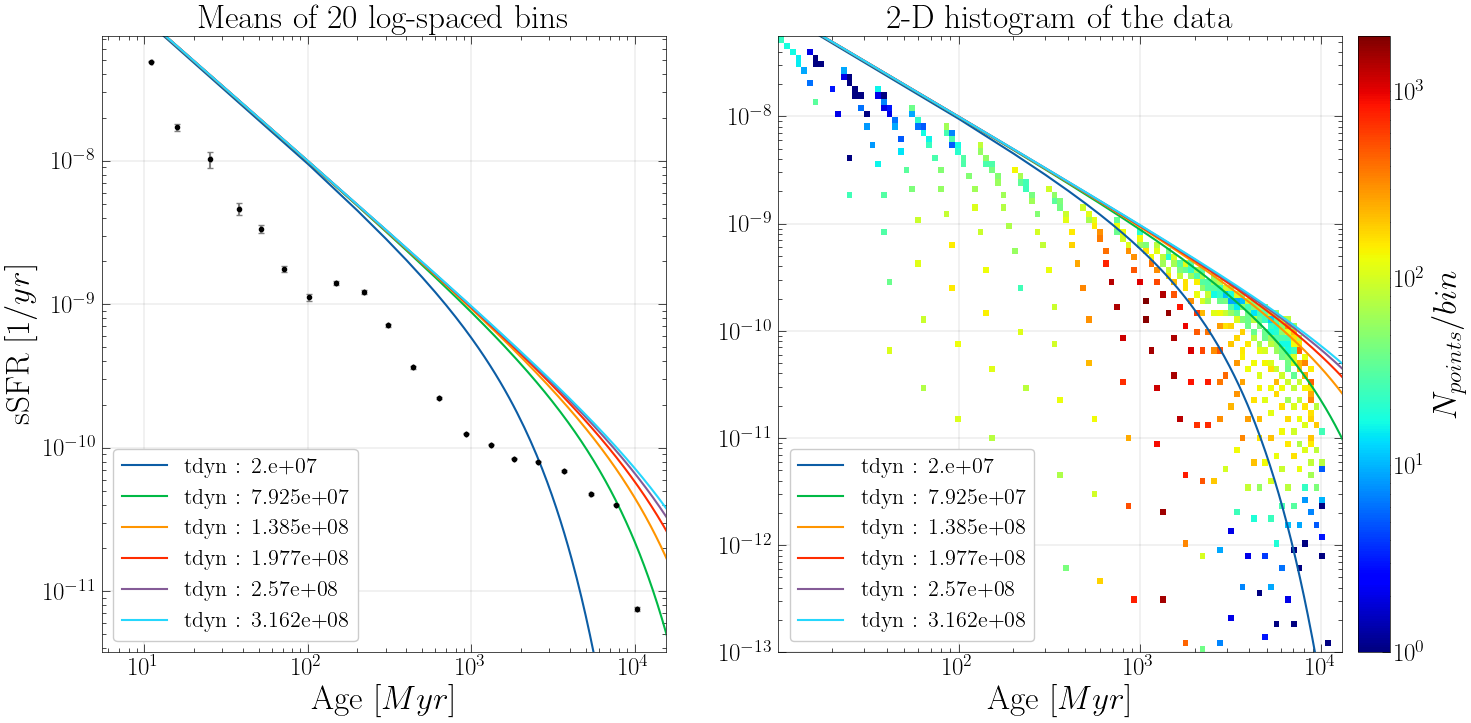

In [13]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

age = np.linspace(10**0, 10**5, 1000) # in Myr

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=100, y_min=1e-13);

for td in tdyn:
    sSFR_points = sSFR(age*10**6, epsilon, td) #in 1/years !!!!!
    ax[0].plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")
    ax[1].plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")

ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')

plt.show()

Let's see how the radius goes

In [14]:
R_1_2 = tdyn / (2*10**7) * 4 #kpc
print(tdyn, "\n", R_1_2)

[2.00000000e+07 7.92455532e+07 1.38491106e+08 1.97736660e+08
 2.56982213e+08 3.16227766e+08] 
 [ 4.         15.84911064 27.69822128 39.54733192 51.39644256 63.2455532 ]


**Circular velocity doesn't change that much!! 100-300 km/s -- big change is radius**


see Shen 2003 ---> "the sky distribution of galaxies in the sdss" ---> guardiamo size-mass relation ----> non ci sono galassie con raggi così grossi !! (crivere una mail a **Fossati** se bramiamo articolo preciso)

size -mass relation in sdss

**Guardiamo class 6 per capire se usare bayes o best!!!**

# 2) Estimate of the dynamical time

Assumption from Ubler et al: $v_{circ} [km/s] \, = \, v_{ref} \,  \left(\dfrac{M_{star}[M_\odot]}{10^b}\right)^{1/a}$, where $a=3.6$, $b=10.5$, $v_{ref}=242km/s$

Assumption from Van der Wel et al: $R_{circ} [kpc] \, = \, A \left(\dfrac{M_{star}[M_\odot]}{M_{ref}}\right)^\alpha$, where $M_{ref}=5 \times 10^{10}[M_\odot]$


In [15]:
def f_R_12(mass_star, A, alpha):
    return A*(mass_star/5e10)**alpha

def f_v_circ(mass_star):
    return 242*(mass_star/10**10.5)**(1/3.6)

def f_t_dyn(R_12, v_circ):
    return 2e7*(R_12/4)/(v_circ/200)

In [16]:
redshift = np.array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75])
A = 10**(np.array([0.86, 0.78, 0.7, 0.65, 0.55, 0.51]))
alpha = np.array([0.25, 0.22, 0.22, 0.23, 0.22, 0.18])

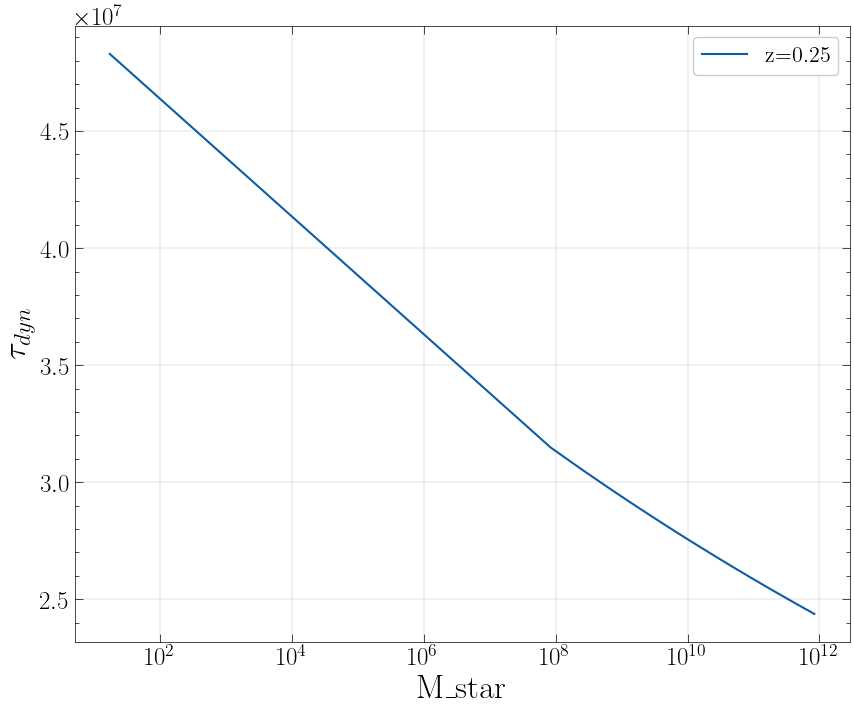

In [17]:
mass_star = results['best.stellar.m_star']
x_dense = np.linspace(np.min(mass_star), np.max(mass_star), 10000)
t_dyn = f_t_dyn(f_R_12(x_dense, A[0], alpha[0]), f_v_circ(x_dense))

plt.plot(x_dense, t_dyn, label=f'z={redshift[0]:.2f}')
plt.xscale('log')
plt.xlabel('M_star')
plt.ylabel('$\\tau_{dyn}$')
plt.legend();

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


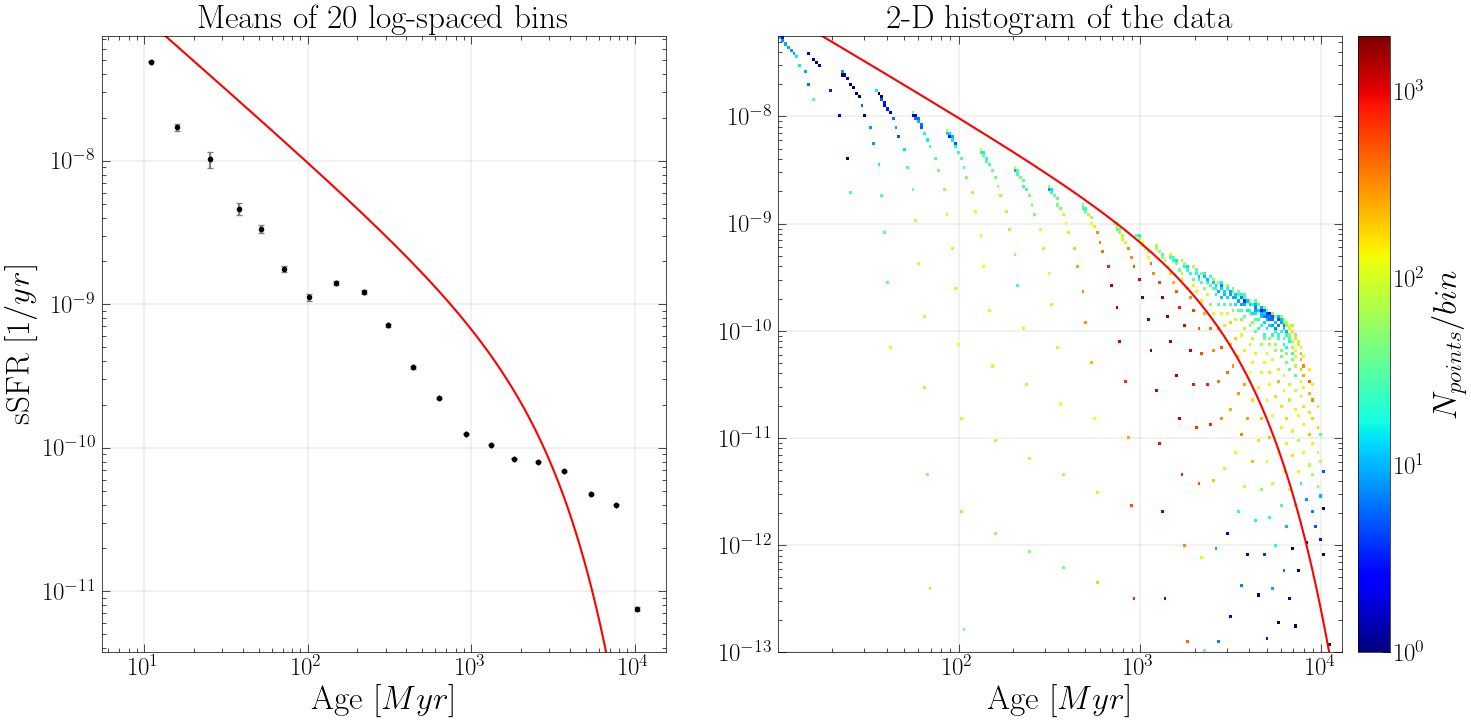

In [18]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
x_dense = np.linspace(np.min(x_data), np.max(x_data), 10000)
sSFR_points = sSFR(x_dense*10**6, epsilon, t_dyn) #in 1/years !!!!!
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=200, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')
ax[0].plot(x_dense, sSFR_points, color='red')
ax[1].plot(x_dense, sSFR_points, color='red');

The closed-box model does not correctly explain the two subpopulations.\
In order to do it, we should include the exchange of matter among galaxies in our model, since we didn't do it before.

# 3) Metallicity

$Z(t) \, = \, Y \, \epsilon' \, (t-t_0)$

In [19]:
Z_sun = 0.02

def f_metallicity(age, Y, epsilon, tdyn):
    epsilon_primed = epsilon / tdyn
    Z = Y*epsilon_primed*age
    return 8.69+np.log10(Z/Z_sun)

In [20]:
epsilon = 0.02 #from Kennicut
tdyn = 2*10**7 #also from Kennicut
Y = 30000

0        8.644752
1        8.884022
4        8.931365
6        8.884022
9        8.713287
           ...   
92463    9.107685
92466    8.456618
92469    9.012921
92481    8.781664
92482    8.908275
Name: best.stellar.age_m_star, Length: 38055, dtype: float64


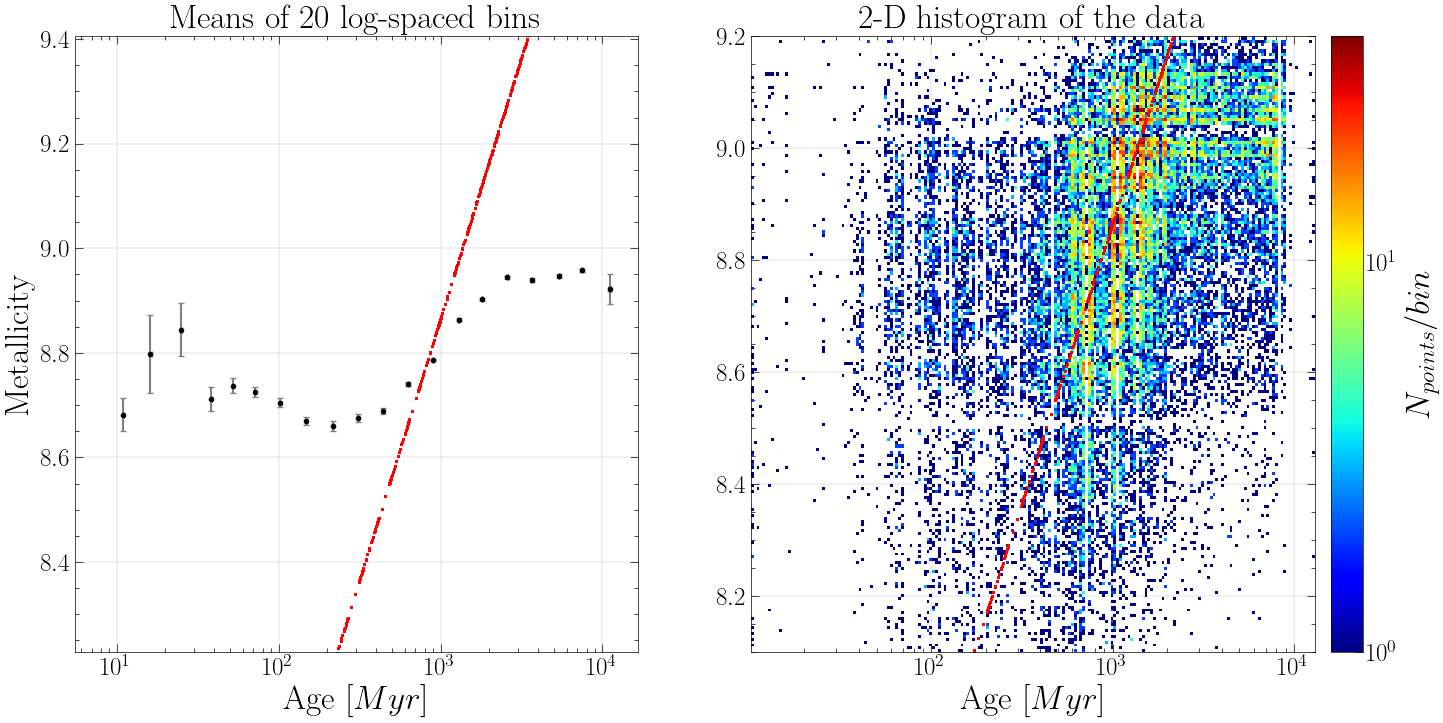

In [21]:
data = Table.read('SDSS_LAB2024_spectroscopy.fits', format='fits')
data = data.to_pandas()

mask = data['log_oh']>-4

x_data = results['best.stellar.age_m_star'][mask]
y_data = data['log_oh'][mask]
metallicity = f_metallicity(x_data, Y, epsilon, tdyn)
print(metallicity)

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'Metallicity', xbins=20, y_min=8.1, y_max=9.2, ylog=False);
ax[0].scatter(x_data, metallicity, s=1, color='red');
ax[1].scatter(x_data, metallicity, s=1, color='red');

# 4) sSFR at equilibrium

In [22]:
def sSFR_vs_mass(mass_star, C):
    return C/mass_star

In [27]:
C = 0.7

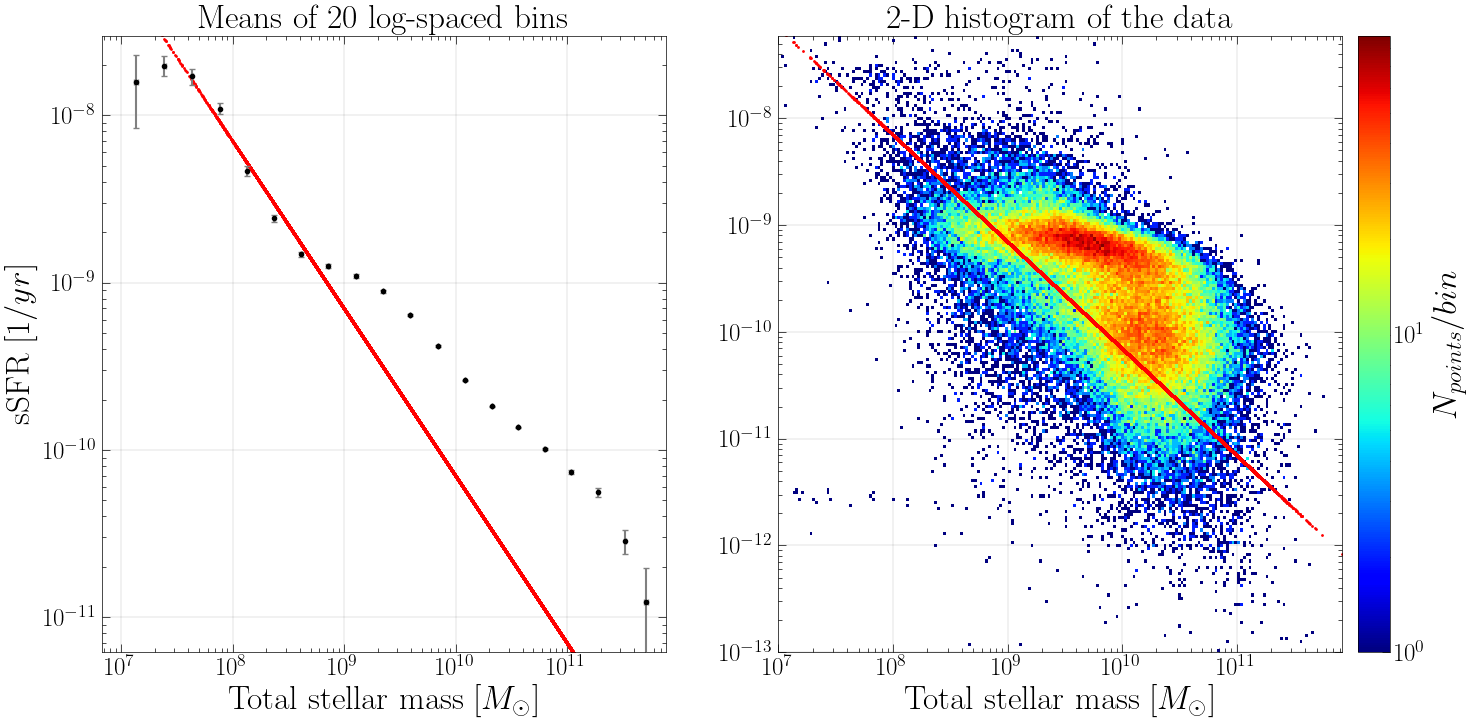

In [28]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
sSFRvsmass = sSFR_vs_mass(x_data, C)
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', xbins=20, x_min=1e7, y_min=1e-13);
ax[0].scatter(x_data, sSFRvsmass, s=1, color='red')
ax[1].scatter(x_data, sSFRvsmass, s=1, color='red');